# **Support Vector Machine**

## **1. Import Library & Dataset**

### **Sumber Dataset: https://www.kaggle.com/brsdincer/star-type-classification**

In [140]:
import os
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [141]:
os.environ['KAGGLE_USERNAME'] = "akmalzuhdyprasetya"
os.environ['KAGGLE_KEY'] = "3f1fd1ffa5d36294293dfb098b3b7392"

In [142]:
!kaggle datasets download -d brsdincer/star-type-classification

star-type-classification.zip: Skipping, found more recently modified local copy (use --force to force download)


In [143]:
!unzip -q /content/star-type-classification.zip

replace Stars.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [144]:
data = pd.read_csv("/content/Stars.csv")
data.head()

,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,3068,0.002400,0.1700,16.12,Red,M,0
1,3042,0.000500,0.1542,16.60,Red,M,0
2,2600,0.000300,0.1020,18.70,Red,M,0
3,2800,0.000200,0.1600,16.65,Red,M,0
4,1939,0.000138,0.1030,20.06,Red,M,0


In [145]:
data.shape

(240, 7)

Text(0.5, 1.0, 'A_M-Spectral_Class Plot')

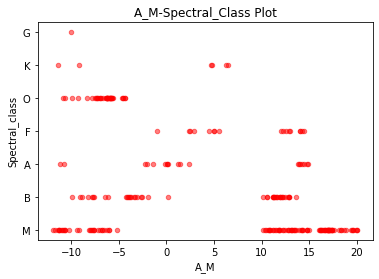

In [146]:
data.plot(kind='scatter', x ='A_M', y='Spectral_Class', alpha=0.5, color='red')
plt.xlabel('A_M')
plt.ylabel('Spectral_class')
plt.title('A_M-Spectral_Class Plot')

## **2. Pre-Processing**

In [147]:
# label encoding
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['Color'] = le.fit_transform(data['Color'])
data['Spectral_Class'] = le.fit_transform(data['Spectral_Class'])

In [148]:
data.describe()

,Temperature,L,R,A_M,Color,Spectral_Class,Type
count,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000
mean,10497.462500,107188.361635,237.157781,4.382396,5.766667,3.758333,2.500000
std,9552.425037,179432.244940,517.155763,10.532512,4.208446,2.090007,1.711394
min,1939.000000,0.000080,0.008400,-11.920000,0.000000,0.000000,0.000000
25%,3344.250000,0.000865,0.102750,-6.232500,1.000000,1.000000,1.000000
50%,5776.000000,0.070500,0.762500,8.313000,8.000000,5.000000,2.500000
75%,15055.500000,198050.000000,42.750000,13.697500,8.000000,5.000000,4.000000
max,40000.000000,849420.000000,1948.500000,20.060000,16.000000,6.000000,5.000000


In [149]:
# Separate Feature and Target Matrix
x = data.drop('Type', axis=1)
y = data['Type']

In [150]:
# Split dataset into training set and test set
# 70% training and 30% test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=100)

## **3. Modelling**

In [151]:
from sklearn.svm import SVC

### **3.1. Linear Kernel**

In [152]:
svc_linear = SVC(kernel='linear')
svc_linear.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [153]:
y_pred_linear = svc_linear.predict(x_test)
y_pred_linear

array([5, 2, 2, 1, 2, 4, 2, 4, 2, 0, 3, 0, 5, 5, 1, 3, 0, 4, 5, 5, 2, 2,
       0, 2, 3, 1, 4, 0, 0, 0, 1, 3, 2, 3, 4, 2, 2, 1, 1, 0, 0, 4, 3, 3,
       1, 3, 5, 2, 4, 0, 4, 2, 4, 3, 2, 5, 2, 5, 3, 1, 0, 1, 1, 5, 1, 2,
       4, 5, 1, 3, 5, 4])

### **3.2. Polynomial Kernel**

In [154]:
svc_poly = SVC(kernel='poly', degree=8)
svc_poly.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=8, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [155]:
y_pred_poly = svc_poly.predict(x_test)
y_pred_poly

array([0, 0, 0, 0, 0, 4, 0, 4, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 5, 0, 0, 0,
       0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 4, 0, 0,
       0, 0, 3, 0, 0, 0, 4, 0, 0, 0, 0, 4, 0, 4, 0, 0, 0, 0, 0, 4, 0, 0,
       0, 3, 0, 0, 5, 4])

### **Gaussian Kernel**

In [156]:
svc_gauss = SVC(kernel='rbf')
svc_gauss.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [157]:
y_pred_gauss = svc_gauss.predict(x_test)
y_pred_gauss

array([5, 0, 0, 0, 0, 4, 0, 4, 0, 0, 0, 0, 4, 4, 0, 0, 0, 5, 4, 5, 0, 0,
       0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 4, 0, 0,
       0, 0, 4, 0, 4, 0, 5, 0, 4, 0, 0, 4, 0, 4, 0, 0, 0, 0, 0, 5, 0, 0,
       5, 4, 0, 0, 5, 4])

### **3.3. Sigmoid Kernel**

In [158]:
svc_sigmoid = SVC(kernel='sigmoid')
svc_sigmoid.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='sigmoid',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [159]:
y_pred_sigmoid = svc_sigmoid.predict(x_test)
y_pred_sigmoid

array([4, 0, 0, 0, 0, 5, 0, 4, 0, 0, 0, 0, 4, 4, 0, 0, 0, 4, 5, 4, 0, 0,
       0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 4, 0, 0,
       0, 0, 4, 0, 4, 0, 5, 0, 4, 0, 0, 4, 0, 4, 0, 0, 0, 0, 0, 5, 0, 0,
       4, 4, 0, 0, 5, 5])

## **4. Model Evaluation**

In [160]:
from sklearn.metrics import classification_report as cr, confusion_matrix as cm

### **4.1. Linear Kernel**

In [161]:
print(cm(y_test, y_pred_linear))
print(cr(y_test, y_pred_linear))

[[11  0  0  0  0  0]
 [ 0 12  0  0  0  0]
 [ 0  0 16  0  0  0]
 [ 0  0  0 11  0  0]
 [ 0  0  0  0 11  0]
 [ 0  0  0  0  0 11]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00        16
           3       1.00      1.00      1.00        11
           4       1.00      1.00      1.00        11
           5       1.00      1.00      1.00        11

    accuracy                           1.00        72
   macro avg       1.00      1.00      1.00        72
weighted avg       1.00      1.00      1.00        72



### **4.2. Polynomial Kernel**

In [162]:
print(cm(y_test, y_pred_poly))
print(cr(y_test, y_pred_poly))

[[11  0  0  0  0  0]
 [12  0  0  0  0  0]
 [16  0  0  0  0  0]
 [11  0  0  0  0  0]
 [ 4  0  0  0  7  0]
 [ 3  0  0  2  4  2]]
              precision    recall  f1-score   support

           0       0.19      1.00      0.32        11
           1       0.00      0.00      0.00        12
           2       0.00      0.00      0.00        16
           3       0.00      0.00      0.00        11
           4       0.64      0.64      0.64        11
           5       1.00      0.18      0.31        11

    accuracy                           0.28        72
   macro avg       0.30      0.30      0.21        72
weighted avg       0.28      0.28      0.19        72



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### **4.3. Gaussian Kernel**

In [163]:
print(cm(y_test, y_pred_gauss))
print(cr(y_test, y_pred_gauss))

[[11  0  0  0  0  0]
 [12  0  0  0  0  0]
 [16  0  0  0  0  0]
 [11  0  0  0  0  0]
 [ 0  0  0  0  7  4]
 [ 0  0  0  0  7  4]]
              precision    recall  f1-score   support

           0       0.22      1.00      0.36        11
           1       0.00      0.00      0.00        12
           2       0.00      0.00      0.00        16
           3       0.00      0.00      0.00        11
           4       0.50      0.64      0.56        11
           5       0.50      0.36      0.42        11

    accuracy                           0.31        72
   macro avg       0.20      0.33      0.22        72
weighted avg       0.19      0.31      0.20        72



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### **4.4. Sigmoid Kernel**

In [164]:
print(cm(y_test, y_pred_sigmoid))
print(cr(y_test, y_pred_sigmoid))

[[11  0  0  0  0  0]
 [12  0  0  0  0  0]
 [16  0  0  0  0  0]
 [11  0  0  0  0  0]
 [ 0  0  0  0  7  4]
 [ 0  0  0  0  8  3]]
              precision    recall  f1-score   support

           0       0.22      1.00      0.36        11
           1       0.00      0.00      0.00        12
           2       0.00      0.00      0.00        16
           3       0.00      0.00      0.00        11
           4       0.47      0.64      0.54        11
           5       0.43      0.27      0.33        11

    accuracy                           0.29        72
   macro avg       0.19      0.32      0.21        72
weighted avg       0.17      0.29      0.19        72



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
